In [1]:
import numpy as np
import torch 
from torch import nn

In [2]:
net = nn.Sequential(
    nn.Linear(30,40),
    nn.ReLU(),
    nn.Linear(40,50),
    nn.ReLU(),
    nn.Linear(50,10)
)

In [4]:
w1 = net[0].weight
b1 = net[0].bias
print(w1.size())

torch.Size([40, 30])


In [13]:
w1.data

tensor([[-0.6336,  0.8377,  0.5725,  ..., -0.7566, -0.6372, -0.5060],
        [ 0.4713, -0.4676,  0.3237,  ...,  0.2730, -0.2929,  0.0972],
        [-0.2867,  0.6116, -0.6109,  ..., -0.3885, -0.3102,  0.7678],
        ...,
        [-0.6776, -0.7251,  0.5586,  ...,  0.2841,  0.4002, -0.3595],
        [-0.7067, -0.8414, -0.6723,  ...,  0.4865, -0.4021,  0.2291],
        [-1.0785, -0.2047,  0.2537,  ..., -0.4934, -0.0045, -0.7789]],
       dtype=torch.float64)

In [7]:
net[0].weight.data = torch.from_numpy(np.random.uniform(3, 5, size=(40, 30)))
print(net[0].weight)

Parameter containing:
tensor([[4.2170, 3.6859, 3.6047,  ..., 3.6886, 4.2505, 3.1825],
        [3.8740, 3.1365, 3.0096,  ..., 3.4001, 3.1456, 3.5802],
        [3.9471, 4.9740, 3.2298,  ..., 4.3938, 3.4001, 3.7958],
        ...,
        [3.6393, 3.8676, 3.0246,  ..., 3.6565, 3.4061, 4.6080],
        [4.3591, 4.9437, 3.2440,  ..., 4.2227, 4.0328, 4.2406],
        [4.2784, 4.0088, 4.9688,  ..., 3.2573, 3.6988, 3.8773]],
       dtype=torch.float64, requires_grad=True)


### 下面对模型中同种类型的层进行参数修改(Xavier)

In [18]:
import math
for layer in net:
    if isinstance(layer, nn.Linear): # 判断是否是线性层
        param_shape = layer.weight.shape
        param_shape0 = layer.weight.shape[0]
        param_shape1 = layer.weight.shape[1]
        param = math.sqrt(param_shape0+param_shape1)
        a00 = math.sqrt(6)
        b00 = a00/param
        layer.weight.data = torch.from_numpy(np.random.normal(-b00, b00, size=param_shape)) 
        # 定义为均值为 0，方差为 0.5 的正态分布

In [26]:
class simple(nn.Module):
    def __init__(self):
        super(simple, self).__init__()
        self.l1 = nn.Sequential(
            nn.Linear(30, 40),
            nn.ReLU()
        )
        self.l1[0].weight.data = torch.randn(40, 30) 
        self.l2 = nn.Sequential(
            nn.Linear(40, 50),
            nn.ReLU()
        )
        self.l3 = nn.Sequential(
            nn.Linear(50, 10),
            nn.ReLU()
        )
    def forward(self, x):
        x = self.l1(x)
        x = self.l2(x)
        x = self.l3(x)
        return x    

In [28]:
net2 = simple()
for i in net2.children():
    print(i)

Sequential(
  (0): Linear(in_features=30, out_features=40, bias=True)
  (1): ReLU()
)
Sequential(
  (0): Linear(in_features=40, out_features=50, bias=True)
  (1): ReLU()
)
Sequential(
  (0): Linear(in_features=50, out_features=10, bias=True)
  (1): ReLU()
)


In [29]:
for i in net2.modules():
    print(i)

simple(
  (l1): Sequential(
    (0): Linear(in_features=30, out_features=40, bias=True)
    (1): ReLU()
  )
  (l2): Sequential(
    (0): Linear(in_features=40, out_features=50, bias=True)
    (1): ReLU()
  )
  (l3): Sequential(
    (0): Linear(in_features=50, out_features=10, bias=True)
    (1): ReLU()
  )
)
Sequential(
  (0): Linear(in_features=30, out_features=40, bias=True)
  (1): ReLU()
)
Linear(in_features=30, out_features=40, bias=True)
ReLU()
Sequential(
  (0): Linear(in_features=40, out_features=50, bias=True)
  (1): ReLU()
)
Linear(in_features=40, out_features=50, bias=True)
ReLU()
Sequential(
  (0): Linear(in_features=50, out_features=10, bias=True)
  (1): ReLU()
)
Linear(in_features=50, out_features=10, bias=True)
ReLU()


##### 下边使用初始化函数对参数进行初始化

In [31]:
from torch.nn import init
print(net[0].weight)

Parameter containing:
tensor([[-0.1026, -0.4982, -0.2729,  ..., -0.3123, -0.7841, -0.3259],
        [-0.4196, -0.4421, -0.3225,  ..., -0.5586,  0.2195, -0.5476],
        [-0.4428, -0.3762, -0.5684,  ...,  0.4938, -0.3059, -0.2230],
        ...,
        [-0.4306,  0.0145, -0.3190,  ..., -0.5308, -0.1155, -0.0829],
        [ 0.1953, -0.0857, -0.2604,  ..., -0.2671, -0.3238, -0.3279],
        [-0.7315, -0.0495, -0.6972,  ..., -0.1782, -0.2119, -0.3725]],
       dtype=torch.float64, requires_grad=True)


##### 与例程不同，版本发生了改变，***_uniform变成了***_uniform_

In [33]:
init.xavier_uniform_(net[0].weight)

Parameter containing:
tensor([[ 0.1772, -0.1773,  0.1419,  ...,  0.1893, -0.2674,  0.1127],
        [ 0.0104,  0.1065,  0.0074,  ..., -0.0463, -0.1958, -0.0447],
        [-0.0613, -0.1595, -0.2059,  ..., -0.2027,  0.2862, -0.0066],
        ...,
        [ 0.2205,  0.0259,  0.1121,  ..., -0.2021, -0.0616, -0.2325],
        [-0.0509, -0.2087,  0.2743,  ..., -0.1535,  0.1564, -0.0545],
        [-0.1770, -0.1975, -0.1860,  ...,  0.0677,  0.0298, -0.0172]],
       dtype=torch.float64, requires_grad=True)

## 下边是参数优化方式

### 1 随机梯度下降与动量法

In [34]:
import numpy as np
import torch
from torchvision.datasets import MNIST # 导入 pytorch 内置的 mnist 数据
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

def data_tf(x):
    x = np.array(x, dtype='float32') / 255 # 将数据变到 0 ~ 1 之间
    x = (x - 0.5) / 0.5 # 标准化
    x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x

# 载入数据集，申明定义的数据变换

train_set = MNIST('./data', train=True, transform=data_tf, download=True) 
test_set = MNIST('./data', train=False, transform=data_tf, download=True)

# 定义 loss 函数
criterion = nn.CrossEntropyLoss()

In [46]:
def sgd_update(parameters,lr):
    for param in parameters:
        param.data = param.data - lr*param.grad.data
        
train_data = DataLoader(train_set,batch_size=100,shuffle=True)

net = nn.Sequential(
    nn.Linear(784,200),
    nn.ReLU(),
    nn.Linear(200,10),
)

losses1 = []
idx = 0

start = time.time()
for e in range(5):
    train_loss = 0
    for im,label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向
        out = net(im)
        loss = criterion(out,label)
        # 反向
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(),1e-2)
        train_loss += loss.item()
        if idx % 30 == 0:
            losses1.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.905683
epoch: 1, Train Loss: 0.412913
epoch: 2, Train Loss: 0.353821
epoch: 3, Train Loss: 0.325500
epoch: 4, Train Loss: 0.306817
使用时间: 43.26565 s


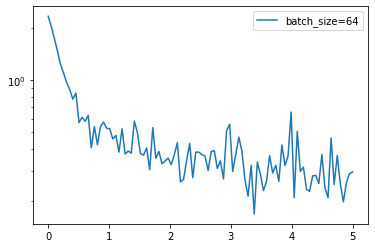

In [47]:
x_axis = np.linspace(0, 5, len(losses1), endpoint=True)
plt.semilogy(x_axis, losses1, label='batch_size=64')
plt.legend(loc='best')

### 使用官方的随机梯度下降方式进行参数更新(在学习率后加上一句momentum=**即可使用动量法进行参数更新)

In [55]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimzier = torch.optim.SGD(net.parameters(), 1e-2,momentum=0.9)
# 开始训练
losses = []
idx = 0

start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimzier.zero_grad()
        loss.backward()
        optimzier.step()
        # 记录误差
        train_loss += loss.item()
        if idx % 30 == 0: # 30 步记录一次
            losses.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.365667
epoch: 1, Train Loss: 0.173876
epoch: 2, Train Loss: 0.126864
epoch: 3, Train Loss: 0.103362
epoch: 4, Train Loss: 0.086339
使用时间: 50.10520 s


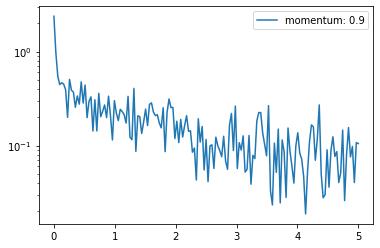

In [56]:
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum: 0.9')
plt.legend(loc='best')

In [ ]:
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.SGD(net.parameters(), lr=1e-2) # 不加动量
# 开始训练
losses1 = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
        if idx % 30 == 0: # 30 步记录一次
            losses1.append(loss.item())
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

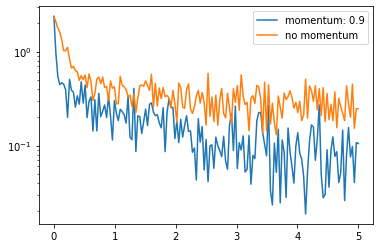

In [60]:
# 两种方式的损失对比
x_axis = np.linspace(0, 5, len(losses), endpoint=True)
plt.semilogy(x_axis, losses, label='momentum: 0.9')
plt.semilogy(x_axis, losses1, label='no momentum')
plt.legend(loc='best')

### 2 Adagrad 只需调用函数torch.optim.Adagrad()即可

### 同样的，后边每一种方式都有对应的函数，直接调用即可。

### Adam

In [61]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    
# 开始训练
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # 记录误差
        train_loss += loss.item()
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.356708
epoch: 1, Train Loss: 0.174241
epoch: 2, Train Loss: 0.124275
epoch: 3, Train Loss: 0.099799
epoch: 4, Train Loss: 0.084166
使用时间: 61.18559 s
